In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("car data (2).csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


handling


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.duplicated().sum()


np.int64(2)

In [8]:
df=df.drop_duplicates()

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
cols=df.select_dtypes(include=np.number)
cols.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

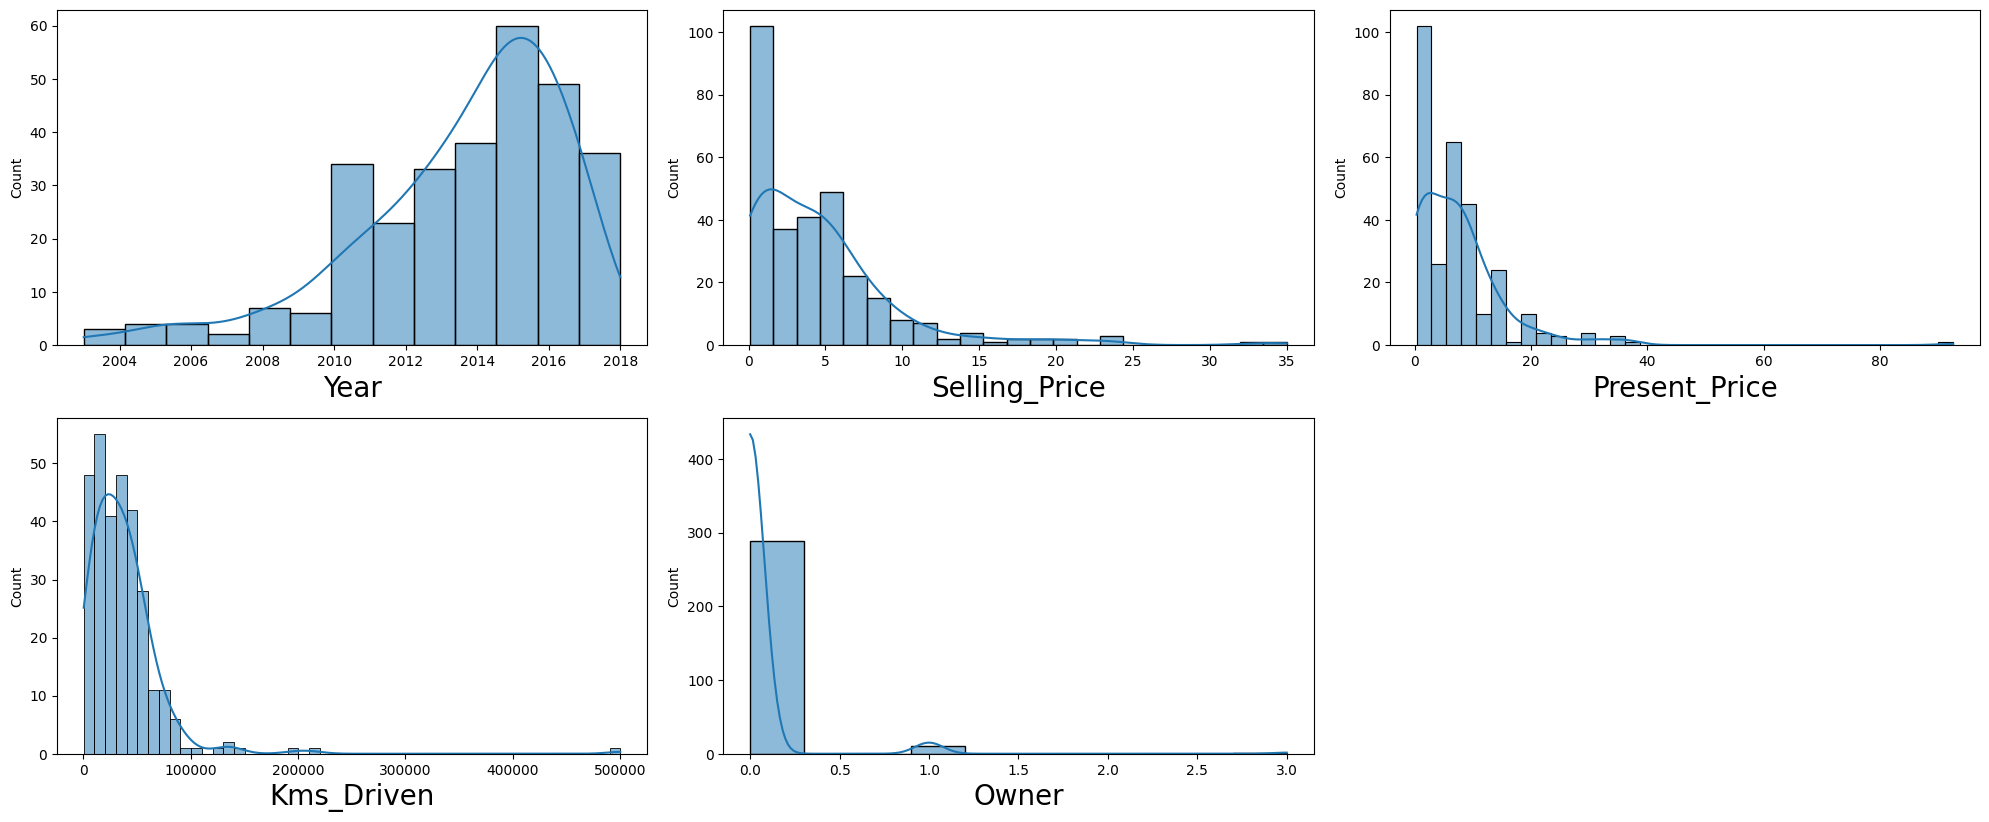

In [11]:
plt.figure(figsize=(20,20))
plotnumber = 1
for column in cols:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

outlier

In [12]:
outlier_cols=df.select_dtypes(include=np.number)
outlier_cols.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [13]:
outlier_cols=['Year','Selling_Price','Present_Price','Kms_Driven']

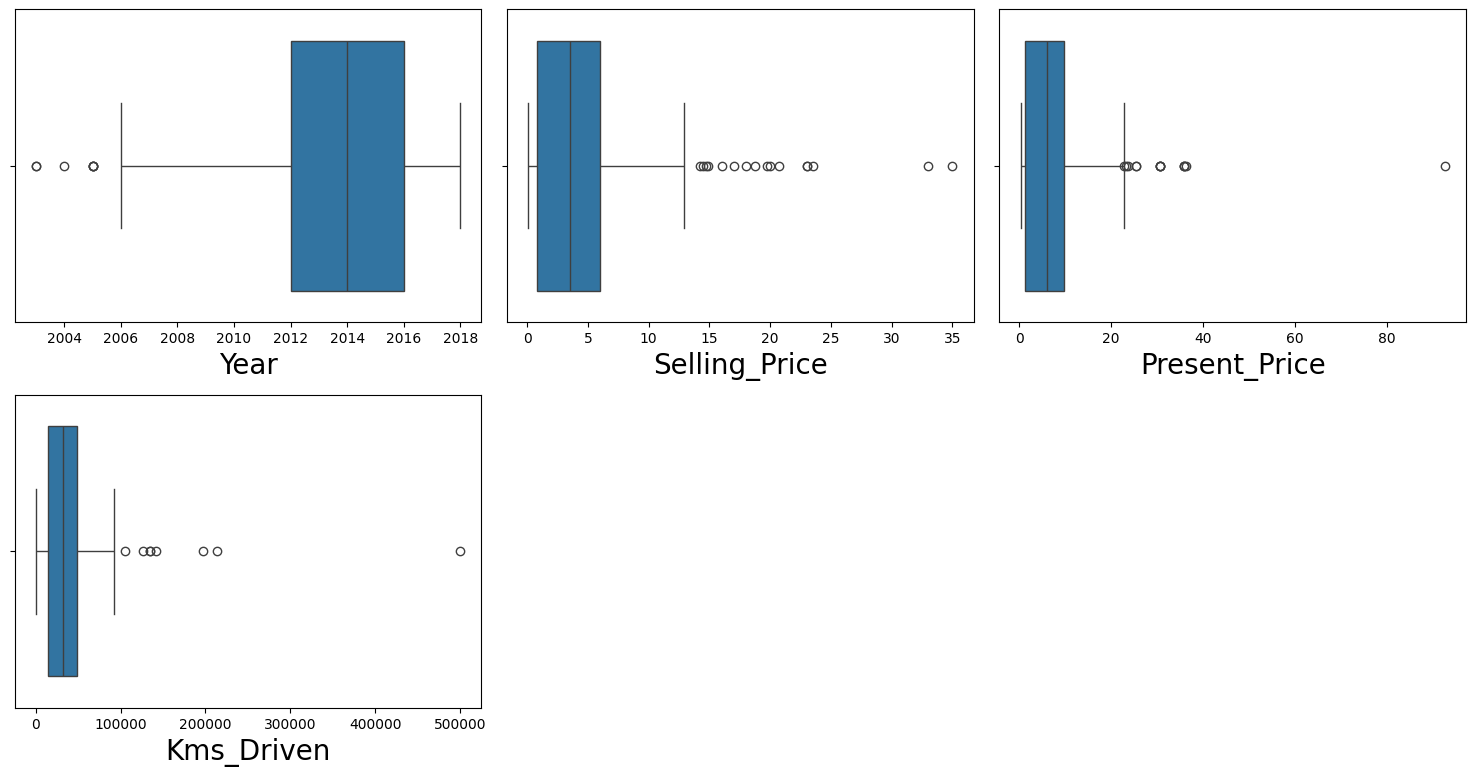

In [14]:
plt.figure(figsize=(15,15))
plotnumber = 1
for column in outlier_cols:
    if plotnumber <= 15:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(x=column, data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [15]:
def remove_outlier_iqr(data,column):
    q1,q2,q3 = np.percentile(data[column],[25,50,75])
    print("q1,q2,q3:",q1,q2,q3)
    IQR = q3 - q1
    print("IQR is:",IQR)
    lower_limit = q1 - (1.5 * IQR)
    upper_limit = q3 + (1.5 * IQR)
    data[column] = np.where(data[column]>upper_limit,upper_limit,data[column])
    data[column] = np.where(data[column]<lower_limit,lower_limit,data[column])

In [16]:
for column in outlier_cols:
    remove_outlier_iqr(df,column)

q1,q2,q3: 2012.0 2014.0 2016.0
IQR is: 4.0
q1,q2,q3: 0.8500000000000001 3.51 6.0
IQR is: 5.15
q1,q2,q3: 1.2 6.1 9.84
IQR is: 8.64
q1,q2,q3: 15000.0 32000.0 48883.5
IQR is: 33883.5


## feature Engineering

In [17]:
df.drop(columns=['Car_Name'],inplace=True)

In [18]:
from datetime import datetime
current_year=datetime.now().year
current_year


2025

In [19]:
df['Car_Age']=current_year-df['Year']
df.drop(columns=['Year'],inplace=True)

In [20]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0,11.0
1,4.75,9.54,43000.0,Diesel,Dealer,Manual,0,12.0
2,7.25,9.85,6900.0,Petrol,Dealer,Manual,0,8.0
3,2.85,4.15,5200.0,Petrol,Dealer,Manual,0,14.0
4,4.60,6.87,42450.0,Diesel,Dealer,Manual,0,11.0


## categorical data

In [21]:
categorical_cols=df.select_dtypes(include='object').columns
categorical_cols

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [22]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [23]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [24]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler


## Label encorde

In [26]:
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df = pd.get_dummies(df,columns=['Seller_Type'],drop_first=True)

In [27]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner,Car_Age,Seller_Type_Individual
0,3.35,5.59,27000.0,2,1,0,11.0,False
1,4.75,9.54,43000.0,1,1,0,12.0,False
2,7.25,9.85,6900.0,2,1,0,8.0,False
3,2.85,4.15,5200.0,2,1,0,14.0,False
4,4.60,6.87,42450.0,1,1,0,11.0,False


## Feature selection

<Axes: >

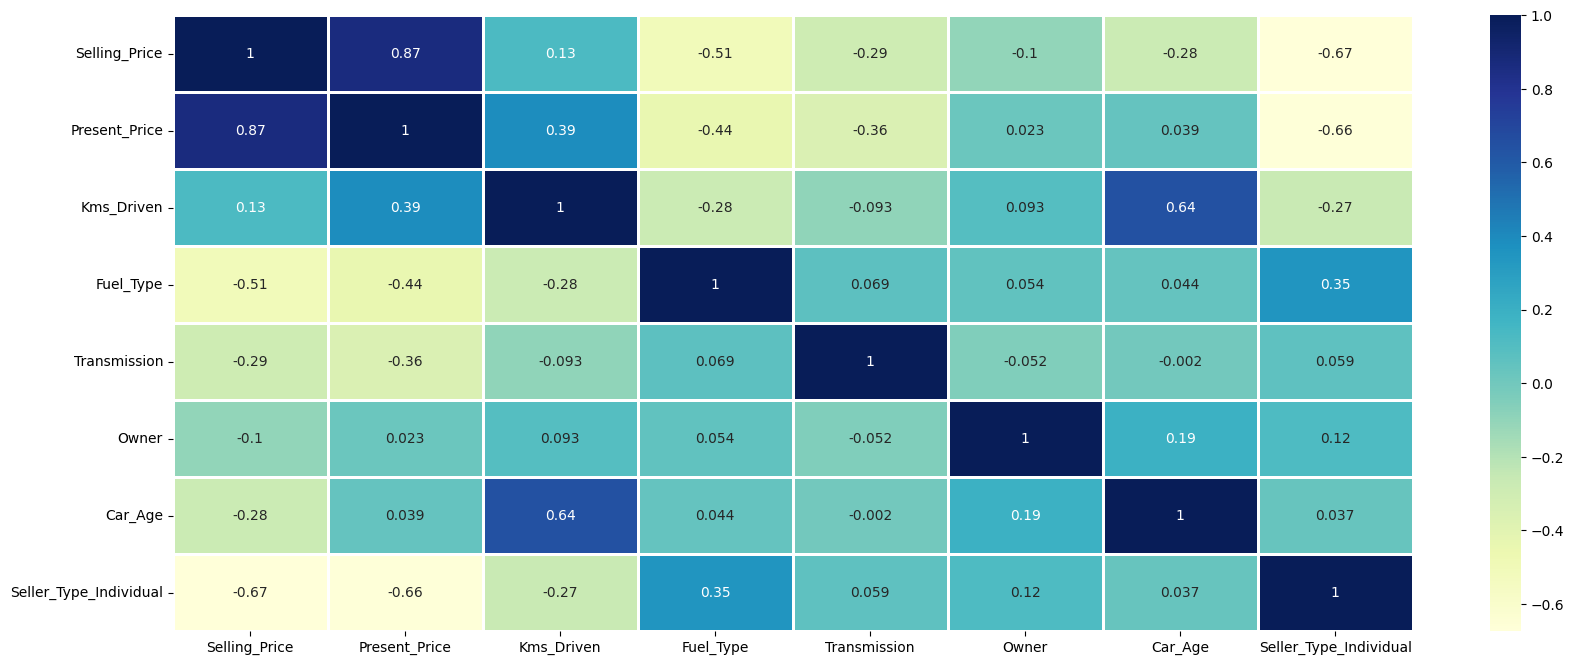

In [28]:
correlation = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlation,annot=True,linewidth=2,cmap='YlGnBu')

In [29]:
x=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [30]:
x

,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner,Car_Age,Seller_Type_Individual
0,5.59,27000.0,2,1,0,11.0,False
1,9.54,43000.0,1,1,0,12.0,False
2,9.85,6900.0,2,1,0,8.0,False
3,4.15,5200.0,2,1,0,14.0,False
4,6.87,42450.0,1,1,0,11.0,False
...,...,...,...,...,...,...,...
296,11.60,33988.0,1,1,0,9.0,False
297,5.90,60000.0,2,1,0,10.0,False
298,11.00,87934.0,2,1,0,16.0,False
299,12.50,9000.0,1,1,0,8.0,False


In [31]:
y


0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

## Scaling

In [32]:
normalizer = MinMaxScaler()
x= normalizer.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6
0,0.234431,0.267114,1.0,1.0,0.0,0.333333,0.0
1,0.410142,0.428390,0.5,1.0,0.0,0.416667,0.0
2,0.423932,0.064510,1.0,1.0,0.0,0.083333,0.0
3,0.170374,0.047375,1.0,1.0,0.0,0.583333,0.0
4,0.291370,0.422846,0.5,1.0,0.0,0.333333,0.0


## train test split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.33)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
# prediction
y_pred=lr_model.predict(x_test)
y_pred

array([ 7.78124869e+00,  7.00983124e+00,  1.21510609e+00,  6.32359659e+00,
        1.15004116e+01,  4.32575716e+00,  9.74211904e+00,  1.68049674e+00,
        7.98121149e+00, -6.56689343e-01,  1.06649358e+01, -9.56347409e-01,
       -6.39127819e-01,  1.47439275e+00,  5.13584878e+00,  5.15780976e+00,
        1.32060254e+00,  1.83909616e+00,  1.47005665e+01,  9.11146095e-01,
        9.37022063e-01,  2.78052542e+00,  5.54246193e+00,  1.70664467e-01,
        5.52210583e+00,  8.33547914e+00,  8.56539226e+00,  1.25473337e+00,
        5.06316587e+00,  5.29446303e+00,  4.87622796e+00,  5.66006267e+00,
        5.52546971e+00,  2.48264556e+00,  2.90892835e+00,  6.19944271e+00,
        1.29139099e+00, -1.64507758e+00,  1.51458973e+00,  1.07802826e+01,
        8.01490640e+00,  8.72520423e+00,  1.56747309e+00,  4.58919847e+00,
        9.48088567e-01, -2.01208919e+00,  8.66704569e+00,  4.23321019e+00,
        4.31095604e+00, -4.01971020e-01,  6.08297704e-01,  1.46060286e-01,
        1.17206848e+01,  

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [39]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [40]:
mae

1.245287702904882

In [41]:
mse

3.6804874039124424

In [42]:
r2

0.7469994394413673

## polynomial regression

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [44]:
poly_model = LinearRegression()
poly_model.fit(x_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
y_pred = poly_model.predict(x_test_poly)

print("Polynomial Regression (Degree 2):")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Polynomial Regression (Degree 2):
MSE: 46.92483267739887
R²: -2.2256621660711953


In [46]:
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

In [47]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [48]:
print(r2_train)
print(r2_test)

0.9187522806138397
0.7469994394413673


## check over fitting andunder fitting

In [49]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(x_train,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [50]:
y_train_pred_ridge = ridge.predict(x_train)
y_test_pred_ridge = ridge.predict(x_test)

In [51]:
from sklearn.metrics import mean_squared_error
mse_train_ridge = mean_squared_error(y_train,y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test,y_test_pred_ridge)

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:",r2)

MSE: 3.5368790012241083
MAE: 1.1899017306403563
R2 Score: 0.7568712315150083


In [53]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)

r2 = r2_score(y_test,y_pred)
r2

3.9455290230808036


0.7287802008291984

In [54]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor

adr = AdaBoostRegressor()
adr.fit(x_train,y_train)
y_pred = adr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)

r2 = r2_score(y_test,y_pred)
r2

3.675478754119316


0.7473437392762087

In [55]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(x_train,y_train)
y_pred = XGB.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)

r2 = r2_score(y_test, y_pred)
print(r2)

3.8301363620204465
0.7367124132588858
